# Explorative Data Analysis



- Opening tabular data
- DataFrames
- Retrieving elements
- Masking
- Statistics


- `.groupby()`



In [3]:
# example with to small documents

- structured data
- rows - columns
- common in statistical analysis
- pandas the main library to works with structured data
- opening a table


In [5]:
# Import and open data

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('data/icem/EW01_london_sample.csv',index_col=0)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4420947 entries, 0 to 4532216
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   RegDist      object
 1   SubDist      object
 2   Sex          object
 3   Age          int64 
 4   DisCode1     int64 
 5   DisCode2     int64 
 6   Industry     object
 7   HISCO        object
 8   DisCodeMain  int64 
 9   Disability   int64 
dtypes: int64(5), object(5)
memory usage: 371.0+ MB


In [8]:
# inspect

In [9]:
df.shape

(4420947, 8)

dataframe as rectangular data
- records
- features/variables

In [72]:
df.head()

,RegDist,SubDist,Sex,Age,DisCode1,DisCode2,Industry,HISCO
0,Paddington,St Mary Paddington,M,63,0,0,.,95410
1,Paddington,St Mary Paddington,F,54,0,0,.,.
2,Paddington,St Mary Paddington,M,30,0,0,.,79620
3,Paddington,St Mary Paddington,M,28,0,0,.,79120
4,Paddington,St Mary Paddington,M,26,0,0,.,96900


# type of variables
    - numerical
        - continuous
        - discrete
    - categorical
        - binary
        - ordinal
        
inspection of by variables
techniques related to  data type of variable
- pandas distinguishes these types

In [10]:
df.DisCode2.value_counts()

0      4397451
800       4089
100       4082
400       3539
500       3478
200       3107
999       1933
230       1929
444        426
880        347
110        160
300        126
120         94
150         33
888         20
180         15
140         15
330         13
280         12
580         11
250         11
350         10
504          9
123          8
235          5
237          5
380          4
804          4
126          2
116          2
144          2
704          1
370          1
567          1
270          1
780          1
Name: DisCode2, dtype: int64

# Location and Dispersion

Understanding variables
Just looking at them doesn't suffice
invented statistics to better understand them
definition of a statistic
"typical" values
"estimate" where most values are located

range of values

In [13]:
df.Age.max()

106

In [14]:
df.Age.min()

0

In [15]:
df.Age.mean()

27.76822341457611

In [161]:
from scipy.stats import trim_mean
trim_mean(df.Age,0.1)

26.300577449580253

is the mean a meaningful valuable measure of location?
trimmed mean a "good compromise"

robust measures
median
middle of sorted list of values
 only one value
    vs mean which uses all values

In [16]:
df.Age.median()

25.0

outliers?
 - distant from other values

# Estimating spread

dispersion, variability in a variable


understanding, explaining variation crucial in statistics, to which we come back later


- computing the deviation between data and estimate of location
- differece  observed and measure of location
- typical value for the deviations

In [17]:
df.Age.std()

18.51897494561922

median absolute deviation from the median / MAD

In [162]:
df.Age.mad()

15.1530251950899

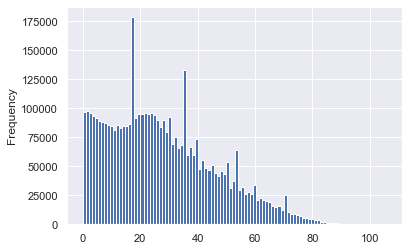

In [11]:
df.Age.plot(kind='hist',bins=100)

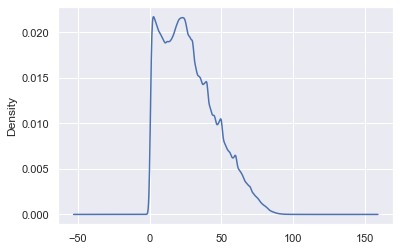

In [12]:
df.Age.plot(kind='density')

In [ ]:
# grouping data

In [ ]:
# Sex and Age Differences

In [20]:
df.groupby('Sex')['Age'].mean()

Sex
F    28.343456
M    27.364935
U    24.472331
Name: Age, dtype: float64

In [21]:
df.groupby('Sex')['Age'].median()

Sex
F    25.0
M    25.0
U    20.0
Name: Age, dtype: float64

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

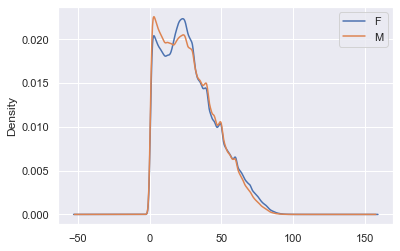

In [25]:
df[df.Sex.isin(['F','M'])].groupby('Sex')['Age'].plot(kind='density',legend=True)

In [35]:
df.groupby(['RegDist'])['Age','Disability'].mean()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Age,Disability
RegDist,,
Bethnal Green,25.602174,0.006591
Camberwell,27.306419,0.007613
Chelsea,30.947606,0.006549
Fulham,27.224348,0.004012
Greenwich,26.843336,0.004006
Hackney,27.940652,0.004912
Hampstead,29.311958,0.004034
Holborn,27.125319,0.006774
Islington,28.195570,0.004210


In [51]:
df.groupby(['RegDist'])['Age','Disability'].mean().sort_values('Age',ascending=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Age,Disability
RegDist,,
Chelsea,30.947606,0.006549
Strand,30.680311,0.002023
St Giles,30.622503,0.003210
St George Hanover Square,30.259325,0.002990
Kensington,30.159826,0.003754
Marylebone,30.064641,0.004840
Paddington,29.635145,0.004220
London City,29.507261,0.004243
Hampstead,29.311958,0.004034


In [94]:
rv = pd.read_csv('./data/icem/rateable_value_1922.csv',index_col=0)
rv.head()

,borough,rateable.value.percapita
0,Battersea,6.1
1,Bermondsey,8.5
2,Bethnal Green,4.9
3,Camberwell,5.2
4,Chelsea,14.7


In [95]:
rv['rateable.value.percapita']

0      6.1
1      8.5
2      4.9
3      5.2
4     14.7
5      5.8
6     14.2
7      6.1
8      7.6
9      5.7
10     7.0
11    13.3
12    32.0
13     5.7
14    14.4
15     6.3
16     6.4
17    10.7
18     5.7
19    23.2
20     8.7
21     8.2
22     6.7
23     6.5
24     6.5
25     6.9
26    57.2
27     6.6
Name: rateable.value.percapita, dtype: float64

In [96]:
#!open ./data/rateable_value_1922.csv

In [97]:
set(df['RegDist'].unique()).intersection(set(rv.borough.unique()))

{'Bethnal Green',
 'Camberwell',
 'Chelsea',
 'Fulham',
 'Greenwich',
 'Hackney',
 'Hampstead',
 'Holborn',
 'Islington',
 'Kensington',
 'Lambeth',
 'Lewisham',
 'Marylebone',
 'Paddington',
 'Pancras',
 'Poplar',
 'Shoreditch',
 'Southwark',
 'Stepney',
 'Wandsworth',
 'Westminster',
 'Woolwich'}

In [98]:
set(df['RegDist'].unique()) - (set(rv.borough.unique()))

{'London City',
 'Mile End Old Town',
 'St George Hanover Square',
 'St George In The East',
 'St Giles',
 'St Olave Southwark',
 'Strand',
 'Whitechapel'}

In [99]:
age_by_dist = df.groupby(['RegDist'])['Age'].mean()
age_by_dist

RegDist
Bethnal Green               25.602174
Camberwell                  27.306419
Chelsea                     30.947606
Fulham                      27.224348
Greenwich                   26.843336
Hackney                     27.940652
Hampstead                   29.311958
Holborn                     27.125319
Islington                   28.195570
Kensington                  30.159826
Lambeth                     28.227379
Lewisham                    28.065542
London City                 29.507261
Marylebone                  30.064641
Mile End Old Town           26.065593
Paddington                  29.635145
Pancras                     28.445942
Poplar                      26.424664
Shoreditch                  26.724759
Southwark                   26.903755
St George Hanover Square    30.259325
St George In The East       24.457116
St Giles                    30.622503
St Olave Southwark          26.233488
Stepney                     25.856036
Strand                      30.680311
Wand

In [100]:
merged = rv.merge(age_by_dist,left_on='borough',right_index=True)
merged

,borough,rateable.value.percapita,Age
2,Bethnal Green,4.9,25.602174
3,Camberwell,5.2,27.306419
4,Chelsea,14.7,30.947606
7,Fulham,6.1,27.224348
8,Greenwich,7.6,26.843336
9,Hackney,5.7,27.940652
11,Hampstead,13.3,29.311958
12,Holborn,32.0,27.125319
13,Islington,5.7,28.195570
14,Kensington,14.4,30.159826


In [124]:
# Correlation and Regression

In [102]:
merged['rateable.value.percapita'].corr(merged['Age'])

0.3643189447496354

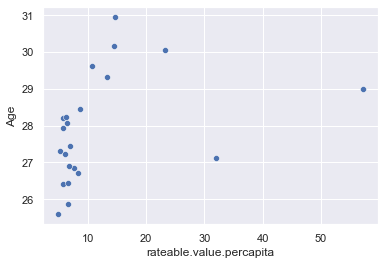

In [103]:
sns.scatterplot(x='rateable.value.percapita',y='Age',data=merged)

In [148]:
merged['rvc_log'] = np.log(merged['rateable.value.percapita'])

In [158]:
wo_outliers = merged[~merged.borough.isin(['Westminster',"Holborn"])]
wo_outliers['rvc_log'].corr(wo_outliers['Age'])

0.8058884133839759

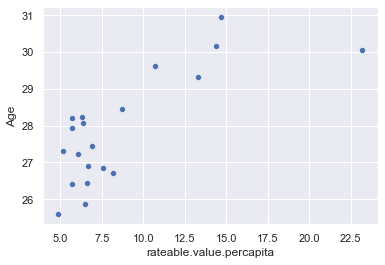

In [150]:
sns.scatterplot(x='rateable.value.percapita',y='Age',data=wo_outliers)

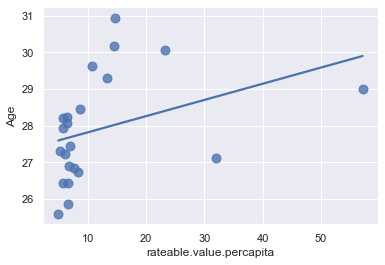

In [151]:
sns.regplot(x="rateable.value.percapita", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

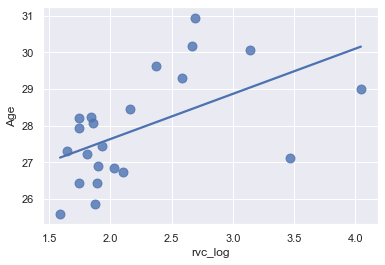

In [152]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

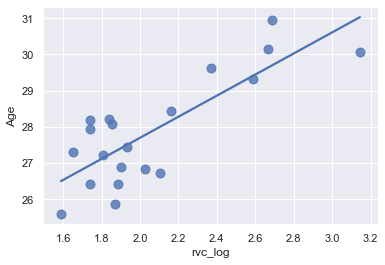

In [153]:
sns.regplot(x="rvc_log", y="Age", data=wo_outliers,
                 scatter_kws={"s": 80},
                 order=1,ci=False)

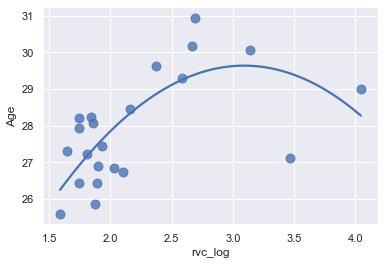

In [154]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=2, ci=False)

In [126]:
import numpy as np
np.polyfit(x=wo_outliers['rateable.value.percapita'], y=wo_outliers['Age'], deg=2)

array([-1.89764975e-02,  7.42595924e-01,  2.32476986e+01])

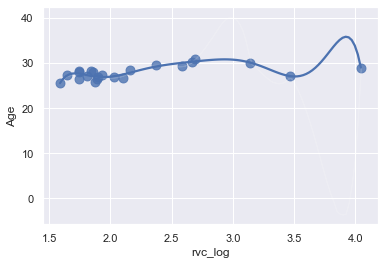

In [157]:
sns.regplot(x="rvc_log", y="Age", data=merged,
                 scatter_kws={"s": 80},
                 order=8, ci=False)

In [110]:
# 

array([-1.89764975e-02,  7.42595924e-01,  2.32476986e+01])

In [163]:
import os
import warnings

import arviz as az
import daft
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from causalgraphicalmodels import CausalGraphicalModel
from scipy import stats
from scipy.interpolate import griddata
from theano import shared

warnings.simplefilter(action="ignore", category=FutureWarning)

In [165]:
def standardize(series):
    """Standardize a pandas series"""
    std_series = (series - series.mean()) / series.std()
    return std_series

In [265]:
merged["Age_std"] = standardize(merged["Age"])
merged["rvc_log_std"] = standardize(merged["rvc_log"])
wo_outliers = merged[~merged.borough.isin(['Westminster',"Holborn"])]

In [267]:
wo_outliers['rvc_log_std']
wo_outliers.shape

(20, 6)

In [268]:
#shared_N = shared(dcc["N"].values)

with pm.Model() as m1:
    sigma = pm.Exponential("sigma", 1)
    bR = pm.Normal("bR", 0, .5)
    a = pm.Normal("a", 0, .5)
    mu = pm.Deterministic("mu", a + bR * wo_outliers['rvc_log_std'].values)

    A = pm.Normal("A", mu, sigma, observed=wo_outliers['Age_std'])

    m1_trace = pm.sample()

m1_data = az.from_pymc3(m1_trace)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bR, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ab8c490>,
      dtype=object)

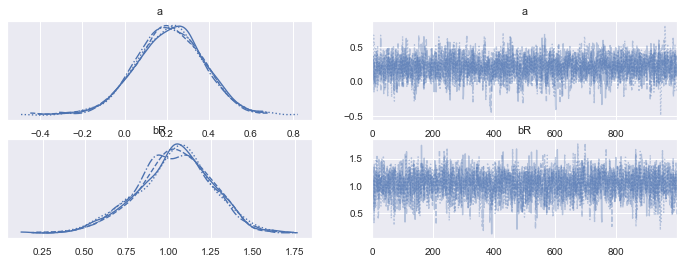

In [269]:
az.plot_trace(m1_trace, var_names=['a','bR'])

In [270]:
xseq = np.linspace(wo_outliers['rvc_log_std'].min()-0.15,wo_outliers['rvc_log_std'].max()+0.15,20)
len(xseq)

20

In [271]:
#shared_r = shared(merged["rvc_log_std"].values)
#shared_r.set_value(xseq)

In [272]:
#shared_r

In [273]:
with m1:
    m1_posterior_predictive = pm.sample_posterior_predictive(m1_trace,var_names=['mu'], samples=4000)

In [274]:
mu_pred = np.zeros((len(xseq),len(m1_trace)*m1_trace.nchains))

In [275]:
for i, age_std in enumerate(xseq):
    mu_pred[i] = m1_trace['a'] + age_std*m1_trace['bR'] 

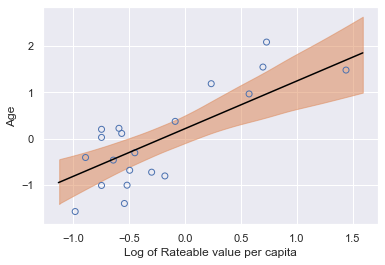

In [276]:
mu_mean = mu_pred.mean(axis=1)

# This is equivalent of Percent Interval
ax = az.plot_hdi(xseq, mu_pred.T)
ax.plot(xseq, mu_mean, c="black")
ax.scatter(wo_outliers["rvc_log_std"], wo_outliers["Age_std"], facecolors="none", edgecolors="b")
#ax.set_ylim(-1.5, 2.2)
ax.set_xlabel("Log of Rateable value per capita")
ax.set_ylabel("Age");

In [44]:
df[df.Sex.isin(['F','M'])].groupby(['RegDist','Sex'])['Age'].mean()

RegDist                   Sex
Bethnal Green             F      25.986728
                          M      25.584048
Camberwell                F      28.020752
                          M      26.772290
Chelsea                   F      31.333669
                          M      30.630576
Fulham                    F      27.965891
                          M      26.673206
Greenwich                 F      27.444230
                          M      26.543862
Hackney                   F      28.657843
                          M      27.401707
Hampstead                 F      29.715547
                          M      28.972054
Holborn                   F      27.436540
                          M      27.039121
Islington                 F      28.981639
                          M      27.609265
Kensington                F      30.882661
                          M      29.338848
Lambeth                   F      28.962971
                          M      27.665589
Lewisham                

In [46]:
unstacked = df[df.Sex.isin(['F','M'])].groupby(['RegDist','Sex'])['Age'].mean().unstack()
unstacked

Sex,F,M
RegDist,,
Bethnal Green,25.986728,25.584048
Camberwell,28.020752,26.772290
Chelsea,31.333669,30.630576
Fulham,27.965891,26.673206
Greenwich,27.444230,26.543862
Hackney,28.657843,27.401707
Hampstead,29.715547,28.972054
Holborn,27.436540,27.039121
Islington,28.981639,27.609265


In [49]:
unstacked['diff'] = unstacked['F'] - unstacked['M']
unstacked

Sex,F,M,diff
RegDist,,,
Bethnal Green,25.986728,25.584048,0.402680
Camberwell,28.020752,26.772290,1.248462
Chelsea,31.333669,30.630576,0.703093
Fulham,27.965891,26.673206,1.292684
Greenwich,27.444230,26.543862,0.900369
Hackney,28.657843,27.401707,1.256136
Hampstead,29.715547,28.972054,0.743493
Holborn,27.436540,27.039121,0.397419
Islington,28.981639,27.609265,1.372373


In [50]:
unstacked.sort_values('diff')

Sex,F,M,diff
RegDist,,,
Strand,29.991236,31.407699,-1.416463
Whitechapel,24.755685,25.978121,-1.222436
St Giles,30.261845,31.017506,-0.755661
Westminster,28.794025,29.434919,-0.640894
Stepney,25.803553,26.136810,-0.333257
St George In The East,24.455504,24.743541,-0.288037
Poplar,26.468120,26.647136,-0.179016
Southwark,26.983512,27.054790,-0.071278
St Olave Southwark,26.540323,26.234821,0.305502


In [ ]:
# Disability

In [26]:
prime_code = lambda x : int(str(x)[0])
df['DisCodeMain'] = df.DisCode2.apply(prime_code)

In [27]:
df.DisCodeMain.value_counts()

0    4397451
2       5070
8       4460
1       4413
4       3965
5       3499
9       1933
3        154
7          2
Name: DisCodeMain, dtype: int64

In [28]:
df['Disability'] = 0 

In [29]:
df.loc[df.DisCodeMain > 0,'Disability'] = 1

In [30]:
df.Disability.value_counts()

0    4397451
1      23496
Name: Disability, dtype: int64

0    4397451
1      23496
Name: Disability, dtype: int64

In [89]:
df.groupby('Sex')['Disability'].count()

Sex
F    2302507
M    1955910
U     162530
Name: Disability, dtype: int64

In [84]:
df.groupby('Sex')['Disability'].sum()

Sex
F    10110
M     9895
U     3491
Name: Disability, dtype: int64

In [105]:
df.groupby(['Sex','Disability'])['RegDist'].count().unstack()

Disability,0,1
Sex,,
F,2292397,10110
M,1946015,9895
U,159039,3491


In [87]:
df.groupby('Sex')['Disability'].sum()[['F','M']]

Sex
F    10110
M     9895
Name: Disability, dtype: int64

In [88]:
from scipy.stats import chisquare
chisquare(df.groupby('Sex')['Disability'].sum()[['F','M']])

Power_divergenceResult(statistic=2.310672331917021, pvalue=0.12848846303704548)

In [ ]:
df.groupby(['Sex','Disability'])['RegDist'].count().unstack()

In [107]:
from scipy.stats import chi2_contingency
chi2_contingency(df.groupby(['Sex','Disability'])['RegDist'].count().unstack())



(8429.120773525228, 0.0, 2, array([[2.29026987e+06, 1.22371303e+04],
        [1.94551493e+06, 1.03950718e+04],
        [1.61666202e+05, 8.63797933e+02]]))

In [ ]:
df.groupby('Sex')['Disco'].sum()[['F','M']]

In [ ]:
df.groupby('Sex')['Age'].mean()

In [ ]:
by_regdist = df.groupby(['RegDist','Sex'])['Age'].mean()

In [ ]:
by_regdist['Whitechapel']

In [ ]:
by_regdist['Westminster']

In [ ]:
byregd = df.groupby(['RegDist','Sex'])['SubDist'].count()

In [ ]:
byregd.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
df['RegDist'].unique()

In [ ]:
ext = pd.read_csv('/Users/kbeelen/Documents/OtherProjects/LondonPulse/metadata/metadata.tsv',sep='\t')
ext.head()

In [ ]:
df.Age.plot(kind='hist',bins=100)

In [ ]:
import tqdm
sample_mean = []
for _ in tqdm.notebook.tqdm(range(1000)):
    sample_mean.append(df.sample(100).Age.mean())

In [ ]:
pd.Series(sample_mean).plot(kind='density')

In [ ]:
import tqdm
sample_mean_m = []; sample_mean_f = []
for _ in tqdm.notebook.tqdm(range(2000)):
    sample_mean_m.append(df[df.Sex=='M'].sample(100).Age.mean())
    sample_mean_f.append(df[df.Sex=='F'].sample(100).Age.mean())

In [ ]:
pd.Series(sample_mean_m).plot(kind='density')
pd.Series(sample_mean_f).plot(kind='density')

In [ ]:
pd.Series(sample_mean_m).plot(kind='density')
pd.Series(sample_mean_f).plot(kind='density')

In [ ]:
sns.violinplot(df.Sex, df.Age,inner='quartile')

In [ ]:
df.groupby('RegCnty')['Age'].mean()

In [129]:
X = pd.get_dummies(df[df.Sex.isin(['M','F'])][['Sex','Age','Disability']],drop_first=True)

In [130]:
X.head()

,Age,Disability,Sex_M
0,63,0,1
1,54,0,0
2,30,0,1
3,28,0,1
4,26,0,1


In [136]:
from statsmodels.discrete.discrete_model import Probit

In [141]:

model = Probit(np.array(X['Disability']), pd.DataFrame(X[['Sex_M']]).assign(const=1))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.029858
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:              4258417
Model:                         Probit   Df Residuals:                  4258415
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:               0.0003957
Time:                        15:17:32   Log-Likelihood:            -1.2715e+05
converged:                       True   LL-Null:                   -1.2720e+05
Covariance Type:            nonrobust   LLR p-value:                 1.085e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex_M          0.0487      0.005     10.039      0.000       0.039       0.058
const         -2.6204      0.003   -774.431      0.000      -2.627      -2.614
==============================================================================
"""

In [140]:
import statsmodels.api as sm
model = sm.GLM(np.array(X['Disability']), pd.DataFrame(X[['Age','Sex_M']]).assign(const=1), family=sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              4258417
Model:                            GLM   Df Residuals:                  4258414
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2282e+05
Date:                Wed, 29 Dec 2021   Deviance:                   2.4564e+05
Time:                        15:13:32   Pearson chi2:                 4.44e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0327      0.000     94.931      0.000       0.032       0.033
Sex_M          0.1868      0.014     13.150      0.000       0.159       0.215
const         -6.5586      0.017   -376.186      0.000      -6.593      -6.524
==============================================================================
"""